# Section 2 : Text Preprocessing

- Tokenization
- Stop Word removal
- Stemming vs. Lemmatization
- Lowercasing, punctuation removal 
- Exercise 1:
- Exercise 2:

In [1]:
import nltk
nltk.download('punkt')       # for tokenization
nltk.download('stopwords')   # for stopword lists
nltk.download('wordnet')     # for lemmatization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\nlp_offline\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\nlp_offline\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\nlp_offline\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Tokenization

In [2]:

from nltk.tokenize import word_tokenize
text = "Natural Language Processing is amazing! import word tokenize"
tokens = word_tokenize(text)
print(tokens)
# ['Natural', 'Language', 'Processing', 'is', 'amazing', '!']

['Natural', 'Language', 'Processing', 'is', 'amazing', '!', 'import', 'word', 'tokenize']


# 2.Stop Word removal
- Stopwords are very common words in a language that do not add much meaning to a sentence.
- Examples in English: the, is, at, in, and, on, a, an...
- When analyzing text, we often remove these words to focus on the important words that carry meaning.

# Why?
- To reduce noise in the data.
- To make the model faster and more accurate.
- Because stopwords appear too often and don’t help classification or understanding.

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "This is a simple example of stop word removal in NLP."
words = word_tokenize(text)
filtered = []
for w in words:
    if w.lower() not in stopwords.words('english'):
        filtered.append(w)
print(filtered)
# Output: ['simple', 'example', 'stop', 'word', 'removal', 'NLP', '.']

['simple', 'example', 'stop', 'word', 'removal', 'NLP', '.']


# 3. Text Normalization

We use lots of variations for same words for examples user might express love in different ways `[lovely, luv, loveee, ...]` all these are the essentially the same to a machine learning model that tries to find out if a review is positive or negative.

So in this notebook we will discuss some methods to reduce text variations.

# 3.1 Stemming

Stemming reduce the text by a set of pre-defined rules like removing `ing` from verbs

In [3]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
           'died', 'agreed', 'owned', 'humbled', 'sized',
           'meeting', 'stating', 'siezing', 'itemization',
           'sensational', 'traditional', 'reference', 'colonizer',
           'plotted']

#singles = [stemmer.stem(plural) for plural in plurals]
singles = []
for plural in plurals:
    single = stemmer.stem(plural)
    singles.append(single)

print(', '.join(singles))

caress, fli, die, mule, deni, die, agre, own, humbl, size, meet, state, siez, item, sensat, tradit, refer, colon, plot


# Snowball stemmer support different languages

In [4]:
from nltk.stem.snowball import SnowballStemmer

print(", ".join(SnowballStemmer.languages))

arabic, danish, dutch, english, finnish, french, german, hungarian, italian, norwegian, porter, portuguese, romanian, russian, spanish, swedish


In [8]:
ar_stemmer = SnowballStemmer("arabic")
ar_stemmer.stem("الجو سماؤه صافية")

'جو سماوه صاف'

# 3.2 Lemmatization

Lemmatizer reduce the word by looking it up in the `WordNet` where it tries to find the root of the word for example `rocks` -> `rock`

In [2]:
#nltk.download('wordnet')
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
"""
Parameter	Meaning	       Example
pos="n"	    Noun	    "cars" → "car"
pos="v"	    Verb	    "running" → "run"
pos="a"	    Adjective	"better" → "good"
pos="r"	    Adverb	    "more quickly" → "quickly"
"""
print("cars :", lemmatizer.lemmatize("cars", pos ="n"))
print("running :", lemmatizer.lemmatize("running", pos ="v"))
print("better :", lemmatizer.lemmatize("better", pos ="a"))
print("more quickly :", lemmatizer.lemmatize("more quickly", pos ="r"))

rocks : rock
corpora : corpus
cars : car
running : run
better : good
more quickly : more quickly


# Lemmatization vs Stemming

The key concept here is that stemming sometime destroy the word unlike lemmatization where we keep the meaning.

# 4. Lowercasing, punctuation removal 

# 4.1. Lowercasing
Lowercasing means converting all letters in the text to lowercase.
This helps keep text consistent — for example, “Apple” and “apple” should be treated the same.

In [5]:
text = "Natural Language Processing IS Amazing!"
lower_text = text.lower()
print(lower_text)
print(text)
# natural language processing is amazing!

natural language processing is amazing!
Natural Language Processing IS Amazing!


# 4.2 Punctuation 
Punctuation marks (like . , ! ?) usually do not add meaning in most NLP tasks.
Removing them simplifies the text.

In [11]:
import string
text = "Hello, world!!! NLP is fun :)"
clean_text = text.translate(str.maketrans('', '', string.punctuation))
print(clean_text)
# Hello world NLP is fun

Hello world NLP is fun 


# Exercise: Clean a text corpus and visualize word frequencies

# Steps Overview
- Load the text corpus (dataset or paragraph).
- Normalize text: lowercase, remove punctuation, numbers, etc.
- Tokenize: split text into words.
- Remove stopwords: filter out common words (e.g., “the”, “is”, “in”).
- Visualize word frequencies using a bar chart or word cloud.

[('language', 5), ('natural', 4), ('processing', 4), ('nlp', 2), ('fascinating', 1), ('field', 1), ('artificial', 1), ('intelligence', 1), ('helps', 1), ('machines', 1)]


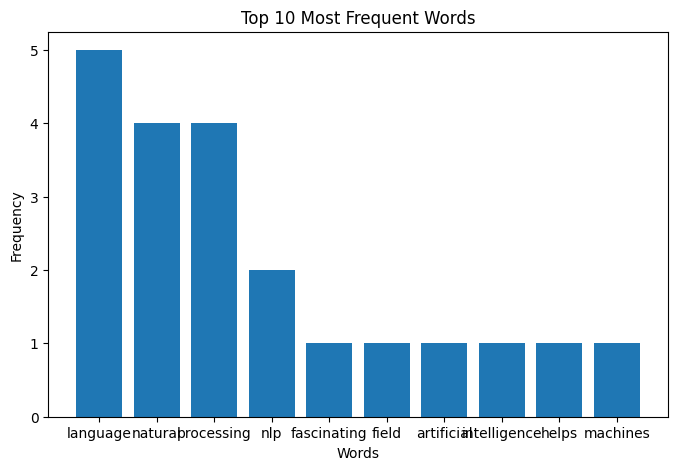

In [13]:
# Step 1: Import Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import matplotlib.pyplot as plt

# Download required resources (only once)
#nltk.download('punkt')
#nltk.download('stopwords')

# Step 2: Load Text
text = """
Natural Language Processing (NLP) is a fascinating field of Artificial Intelligence.
It helps machines understand and process human language effectively.
NLP has many applications such as translation, chatbots, and sentiment analysis .
Natural Language Processing Natural Language Processing Natural Language Processing
"""

# Step 3: Lowercasing
text = text.lower()

# Step 4: Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Step 5: Tokenization
tokens = word_tokenize(text)

# Step 6: Remove stopwords
stop_words = set(stopwords.words('english'))
#filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
filtered_tokens = []
for word in tokens:
    if word not in stop_words and word.isalpha():
        filtered_tokens.append(word)

# Step 7: Count word frequencies
word_freq = Counter(filtered_tokens)

# Step 8: Display 10 most common words
print(word_freq.most_common(10))

# Step 9: Visualization
plt.figure(figsize=(8,5))
plt.bar(*zip(*word_freq.most_common(10)))
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Exercise 2: 
Write a Python program to perform a basic sentiment analysis on a list of text sentences.

# Steps Overview:
- Create a small dataset of sentences containing positive and negative emotions.
- Clean the text by converting it to lowercase and tokenizing the words.
- Define two simple word lists — one for positive words and one for negative words.
- Count how many positive and negative words appear in each sentence.
- Classify each sentence as Positive, Negative, or Neutral based on the counts.
- Visualize the sentiment distribution using a simple bar chart.

# Expected Output:
- A printed list of sentences with their predicted sentiment label.
- A bar chart showing how many sentences are Positive, Negative, and Neutral.